<a href="https://colab.research.google.com/github/sakthi-swetha/Oasis-Infobyte-Intern/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [4]:
import pandas as pd

# Replace with the exact file name you uploaded
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

# Check if loaded successfully
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
print("Shape of dataset:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nFirst 5 Rows:\n")
print(data.head())


Shape of dataset: (267, 9)

Column Names:
 Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

First 5 Rows:

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             1588

In [10]:
# Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Rename columns
data.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


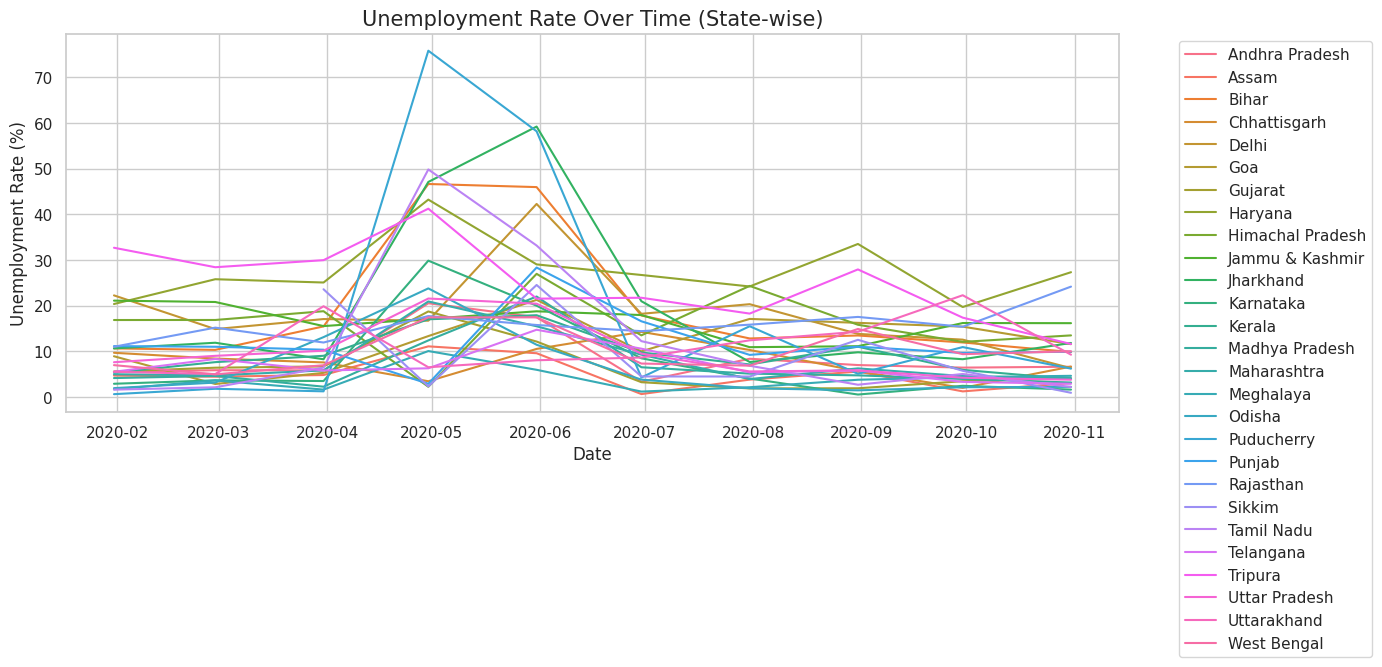

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='Unemployment_Rate', hue='State')
plt.title('Unemployment Rate Over Time (State-wise)', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1694688401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='viridis')


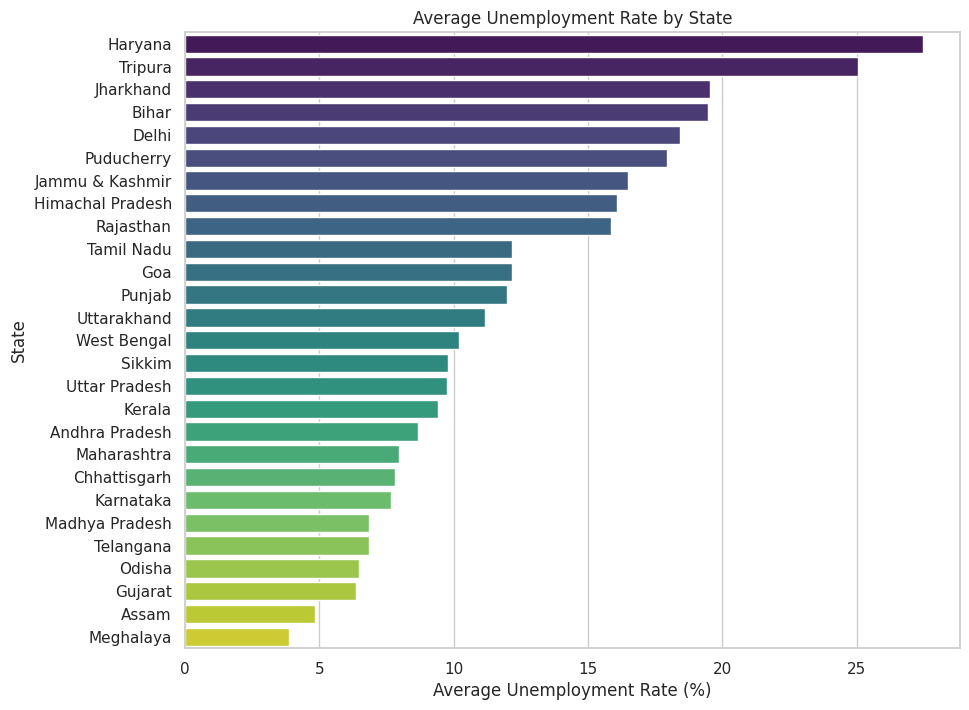

In [12]:
avg_unemp = data.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='viridis')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.show()


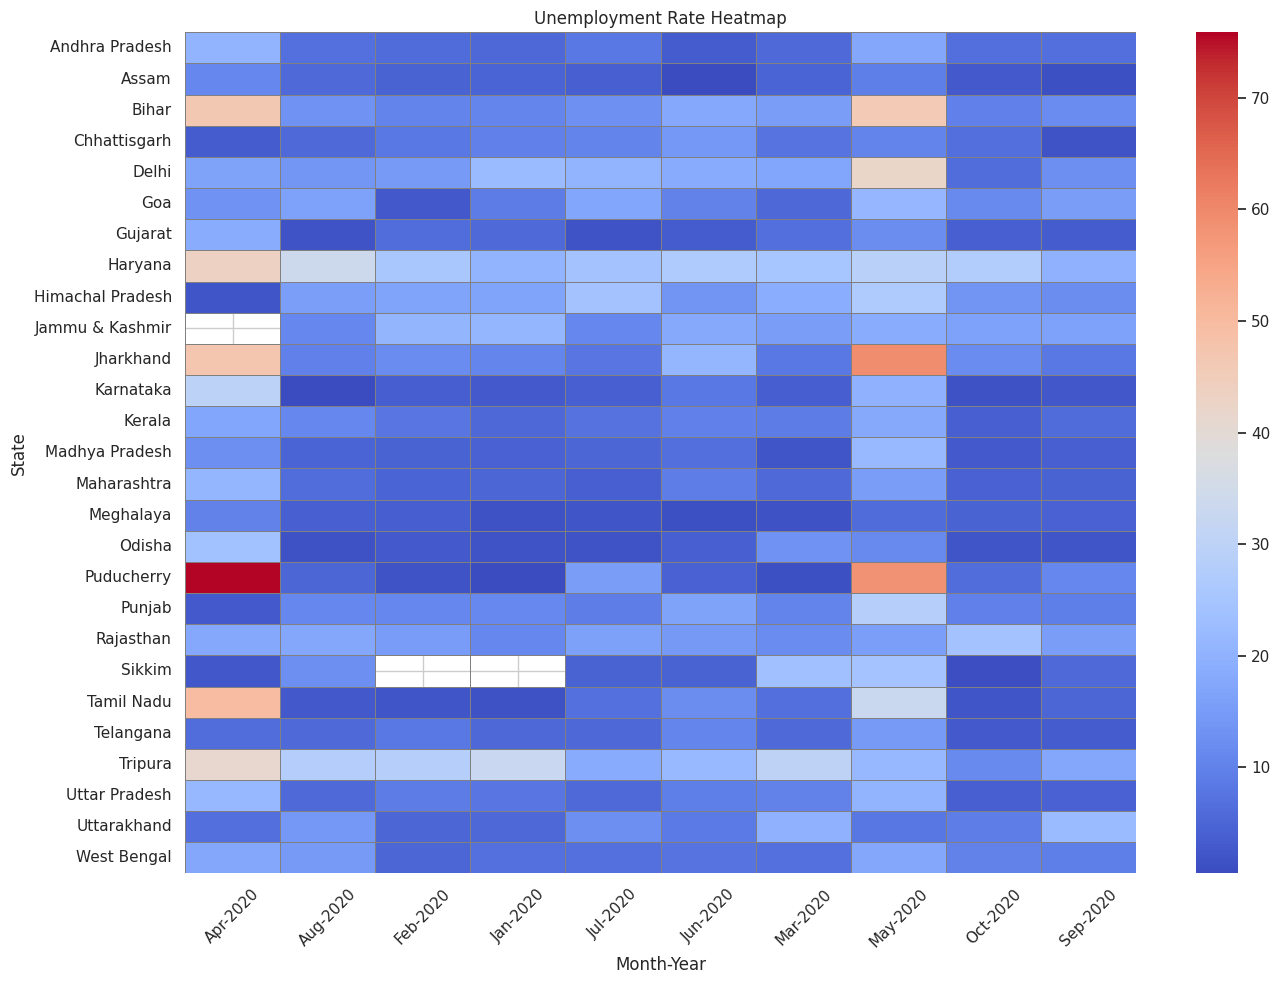

In [13]:
pivot = data.pivot_table(values='Unemployment_Rate', index='State', columns=data['Date'].dt.strftime('%b-%Y'))

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Unemployment Rate Heatmap')
plt.xlabel('Month-Year')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
